In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('Telco_Customer_Churn - Telco_Customer_Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.TotalCharges.isnull().sum()

11

In [12]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True) # dropping rows wasn't working

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

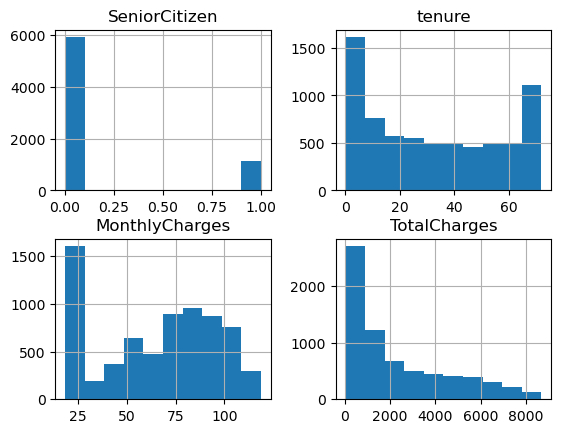

In [14]:
df.hist()
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['gender','MultipleLines', 'InternetService', 
                                 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 
                                 'PaymentMethod'])


In [16]:
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [18]:
ordinal_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df['Contract'] = ordinal_encoder.fit_transform(df[['Contract']])

In [19]:
df['Contract']=df['Contract'].astype(int)

In [20]:

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [21]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,1,0,56.95,1889.50,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,1,0,42.30,1840.75,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,84.80,1990.50,...,0,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,1,103.20,7362.90,...,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,0,1,29.60,346.45,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,0,1,74.40,306.60,...,1,0,0,1,0,0,0,0,0,1


In [88]:
df["Churn"].value_counts() 

Churn
0    5174
1    1869
Name: count, dtype: int64

In [22]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Female', 'gender_Male',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automa

# Predicting Churn

In [23]:
X=df.drop('customerID',axis=1)
X=X.drop('Churn',axis=1)
y=df['Churn']

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.20,shuffle=True)

In [38]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

knn_params = {
    'n_neighbors': [3, 5, 7,9,11,13,15,14],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
nb_params={
}

# KNN

In [39]:
scaler=StandardScaler()

In [40]:
scaler.fit(X_train) 
X_train_knn = scaler.transform(X_train)
X_test_knn = scaler.transform(X_test)

In [41]:
X_train_knn

array([[-0.44521178, -0.96510953, -0.65487501, ...,  1.90310829,
        -0.71191292, -0.54329772],
       [ 2.24612208, -0.96510953, -0.65487501, ..., -0.52545617,
         1.40466618, -0.54329772],
       [ 2.24612208,  1.03615182, -0.65487501, ..., -0.52545617,
         1.40466618, -0.54329772],
       ...,
       [-0.44521178, -0.96510953, -0.65487501, ...,  1.90310829,
        -0.71191292, -0.54329772],
       [ 2.24612208,  1.03615182, -0.65487501, ..., -0.52545617,
         1.40466618, -0.54329772],
       [-0.44521178, -0.96510953, -0.65487501, ..., -0.52545617,
        -0.71191292,  1.84061144]])

In [42]:
def train_knn_with_k(k_value):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_knn, y_train)

    y_pred = knn.predict(X_test_knn)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    return knn, accuracy, classification_rep


In [43]:
knn_model_k, accuracy_k, classification_report_k=train_knn_with_k(14)

In [44]:
print(accuracy_k)
print(classification_report_k)

0.7920511000709723
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1046
           1       0.64      0.45      0.53       363

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [45]:
cross_validate(knn_model_k, X_train_knn, y_train, cv=10)

{'fit_time': array([0.00489163, 0.00274897, 0.00263953, 0.00457478, 0.00454783,
        0.00465989, 0.00437641, 0.00257087, 0.00452662, 0.00258827]),
 'score_time': array([0.10265589, 0.07222176, 0.07385635, 0.07307839, 0.07323074,
        0.08163548, 0.07703137, 0.07352161, 0.06953764, 0.07252812]),
 'test_score': array([0.78546099, 0.76595745, 0.78546099, 0.78191489, 0.78330373,
        0.79573712, 0.76554174, 0.77797513, 0.75488455, 0.75310835])}

In [46]:
def plot_accuracy_vs_k_seaborn(max_k=20):
    accuracies = []
    k_values = range(1, max_k+1)
    
    for k in k_values:
        _, accuracy, _ = train_knn_with_k(k)
        accuracies.append(accuracy)
    
    accuracy_df = pd.DataFrame({'K': k_values, 'Accuracy': accuracies})
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='K', y='Accuracy', data=accuracy_df, marker='o')
    plt.title('KNN Accuracy for different K values')
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    best_k = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]['K']
    best_accuracy = accuracy_df['Accuracy'].max()
    
    return best_k, best_accuracy

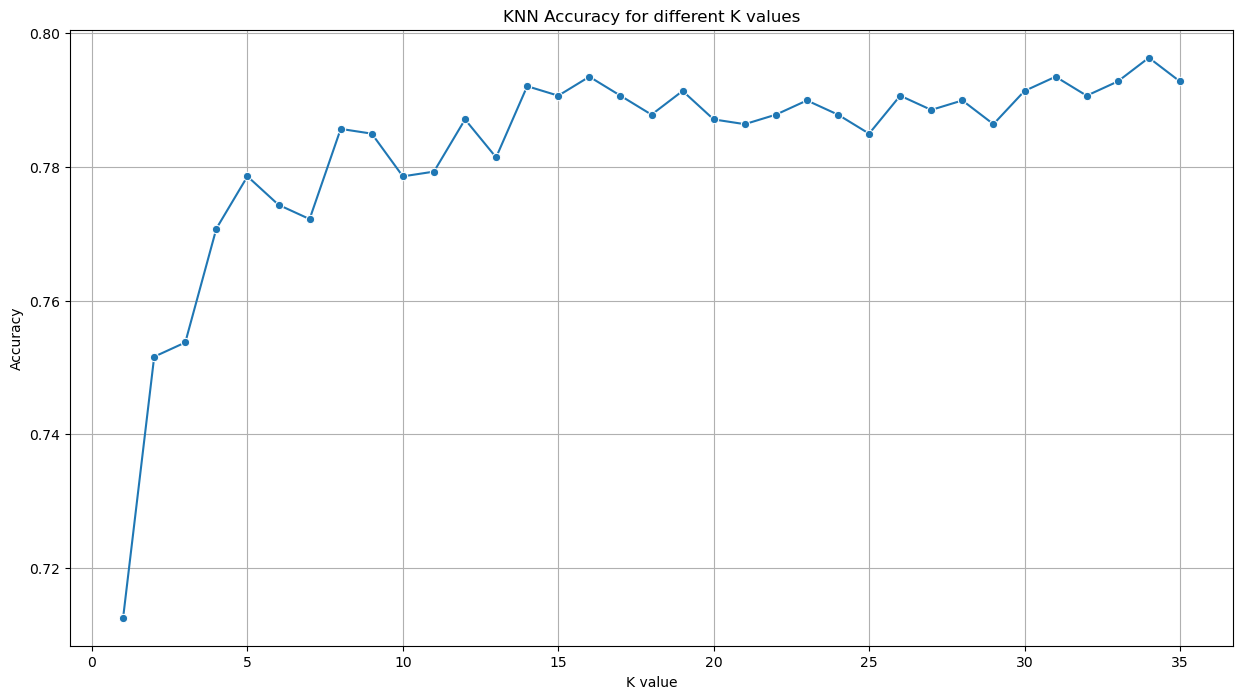

(34.0, 0.7963094393186657)

In [47]:
plot_accuracy_vs_k_seaborn(35)

In [48]:
knn_grid_search = GridSearchCV(estimator=knn_model_k, param_grid=knn_params, cv=2, scoring='accuracy', verbose=1)
knn_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [49]:
print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)

KNN Best Params: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
KNN Best Score: 0.7756478523251686


# Naive Bayes

In [82]:
nbClassifier=GaussianNB()

In [83]:
nbClassifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred=nbClassifier.predict(X_test)

In [85]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy_knn:.2f}")

Naive Bayes Accuracy: 0.69


In [86]:
classification_rep = classification_report(y_test, y_pred)

In [87]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print(classification_rep)

KNN Confusion Matrix:
[[652 394]
 [ 49 314]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1046
           1       0.44      0.87      0.59       363

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.80      0.69      0.71      1409



In [77]:
nb_grid_search = GridSearchCV(estimator=nbClassifier, param_grid=nb_params, cv=5, scoring='accuracy', verbose=1)
nb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={}, scoring='accuracy',
             verbose=1)

In [78]:
print("Naive Bayes Best Score:", nb_grid_search.best_score_)

Naive Bayes Best Score: 0.6797967221485861


# Random Forest 

In [95]:
rf=RandomForestClassifier(max_depth=8,max_samples=0.80,max_features=0.60)

In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.6, max_samples=0.8)

In [97]:
y_pred=rf.predict(X_test)

In [98]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.81


In [99]:
classification_rep = classification_report(y_test, y_pred)

In [100]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:")
print(conf_matrix_knn)
print(classification_rep)

Random Forest Confusion Matrix:
[[954  92]
 [181 182]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1046
           1       0.66      0.50      0.57       363

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [65]:
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, cv=2, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=8, max_features=0.6,
                                              max_samples=0.8),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [66]:
print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

Random Forest Best Params: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Score: 0.7992545260915869


# Best Models on Test Data

In [79]:
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.7984386089425124


In [80]:
knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Test Accuracy: 0.7806955287437899


In [81]:
nb_best = nb_grid_search.best_estimator_
y_pred_nb = nb_best.predict(X_test)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Test Accuracy: 0.6855926188786373


# Conclusions

-> Random Forest is more balanced, with a higher overall accuracy (80%) and a decent performance for Class 0, but it struggles to detect churn (Class 1) with low recall.



-> KNN does better at identifying churn (high recall for Class 1), but at the cost of a higher false positive rate, meaning it misclassifies many non-churn instances as churn, leading to lower precision for Class 0.